# Cryptocurrency Transaction Analysis

This notebook aims to analyze cryptocurrency transaction data to identify suspicious activities, patterns, or anomalies.

## Table of Contents

1. [Data Preparation](#Data-Preparation)
2. [EDA](#Data-Preparation)
2. [Visualizations](#Visualizations)
3. [Additional Calculations](#Additional-Calculations)


### Dataset Columns Description

1. `Timestamp`: The time at which the transaction was made.

2. `Transaction_Type`: Indicates the type of transaction, either 'Buy' or 'Sell'.

3. `Wallet_Balance`: The balance of the wallet after the transaction.

4. `Network_Congestion`: A measure of how congested the network was at the time of the transaction.

5. `Transaction_Fee`: The total fee for the transaction, including gas fees and additional charges.

6. `Transaction_Amount`: The amount of cryptocurrency being transferred in the transaction.

7. `Gas_Fee`: The fee paid for the transaction to be processed.

8. `Hash_Rate`: The hash rate at the time of the transaction.

9. `Block_Time`: The time it took for the block containing the transaction to be added to the blockchain.

## Data Preparation


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('crypto.csv')

# Display the first few rows of the DataFrame
df.head()



,Timestamp,Transaction_Type,Wallet_Balance,Network_Congestion,Transaction_Fee,Transaction_Amount,Gas_Fee,Hash_Rate,Block_Time
0,1/1/2022 0:00,Sell,669.085220,58.530720,13.395308,676.405235,7.320015,115.932736,6.934158
1,1/1/2022 0:01,Buy,1202.808309,46.706930,12.496226,540.015721,6.292631,105.687224,6.576060
2,1/1/2022 0:02,Buy,1795.125685,42.188570,9.685309,597.873798,5.556423,98.855130,10.092270
3,1/1/2022 0:03,Buy,2511.869397,55.486995,12.549718,724.089320,7.345607,102.516302,8.083251
4,1/1/2022 0:04,Buy,3191.529585,47.843569,12.342510,686.755799,7.095611,87.891444,9.838377


## Exploratory Data Analysis (EDA)

In [16]:
df.describe()

,Wallet_Balance,Network_Congestion,Transaction_Fee,Transaction_Amount,Gas_Fee,Hash_Rate,Block_Time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,245644.043578,49.486452,9.972461,495.474329,4.968360,99.810574,9.897543
std,140437.420164,10.260539,1.664478,98.752705,1.361324,10.163214,1.909189
min,669.085220,21.845446,4.857333,195.385694,0.975069,62.598994,3.766287
25%,124924.551450,42.552723,8.812057,430.157994,3.992741,92.895275,8.526671
50%,246496.795350,49.236745,9.970191,494.197197,4.982784,99.717342,9.895004
75%,366157.857050,56.181499,11.153236,560.695060,5.879308,106.618254,11.243232
max,490505.969000,82.145086,15.144495,775.935511,9.174226,138.016602,15.858192


In [17]:
# Checking if any Null values are present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1000 non-null   object 
 1   Transaction_Type    1000 non-null   object 
 2   Wallet_Balance      1000 non-null   float64
 3   Network_Congestion  1000 non-null   float64
 4   Transaction_Fee     1000 non-null   float64
 5   Transaction_Amount  1000 non-null   float64
 6   Gas_Fee             1000 non-null   float64
 7   Hash_Rate           1000 non-null   float64
 8   Block_Time          1000 non-null   float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


### Transaction Amount Over Time (Hourly) 


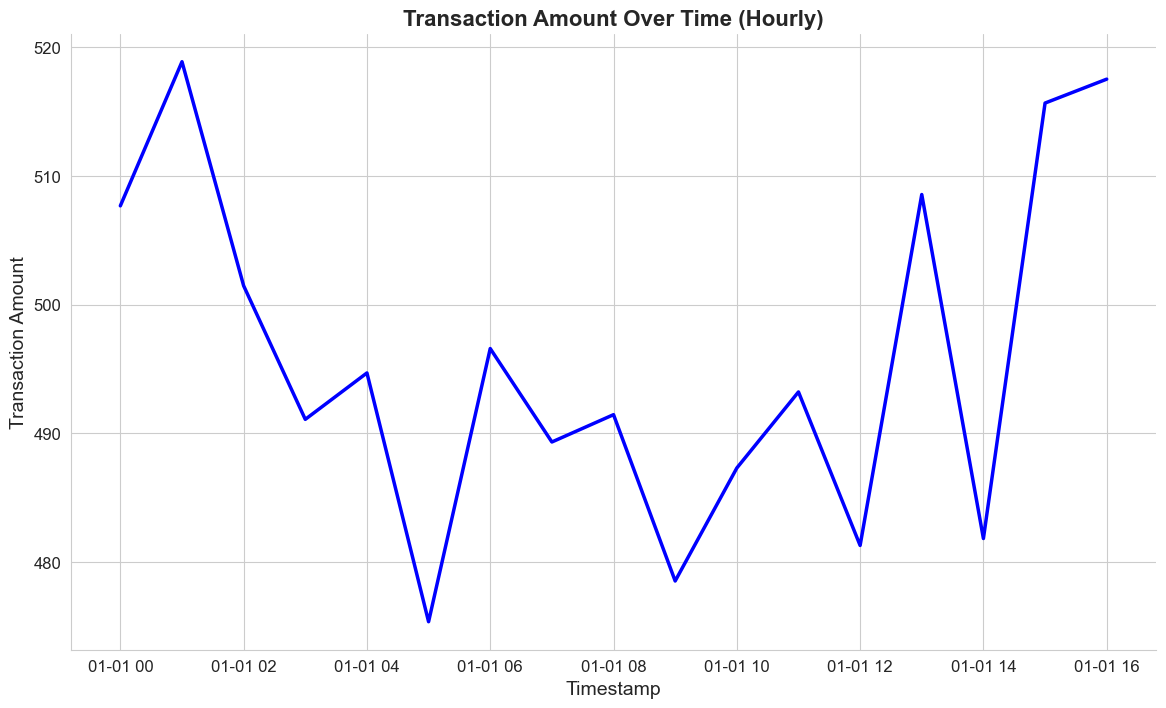

In [23]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x=df_resampled.index, y='Transaction_Amount', data=df_resampled, linewidth=2.5, color='blue')
plt.title('Transaction Amount Over Time (Hourly)', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


### Gas Fee Over Time (Hourly) 


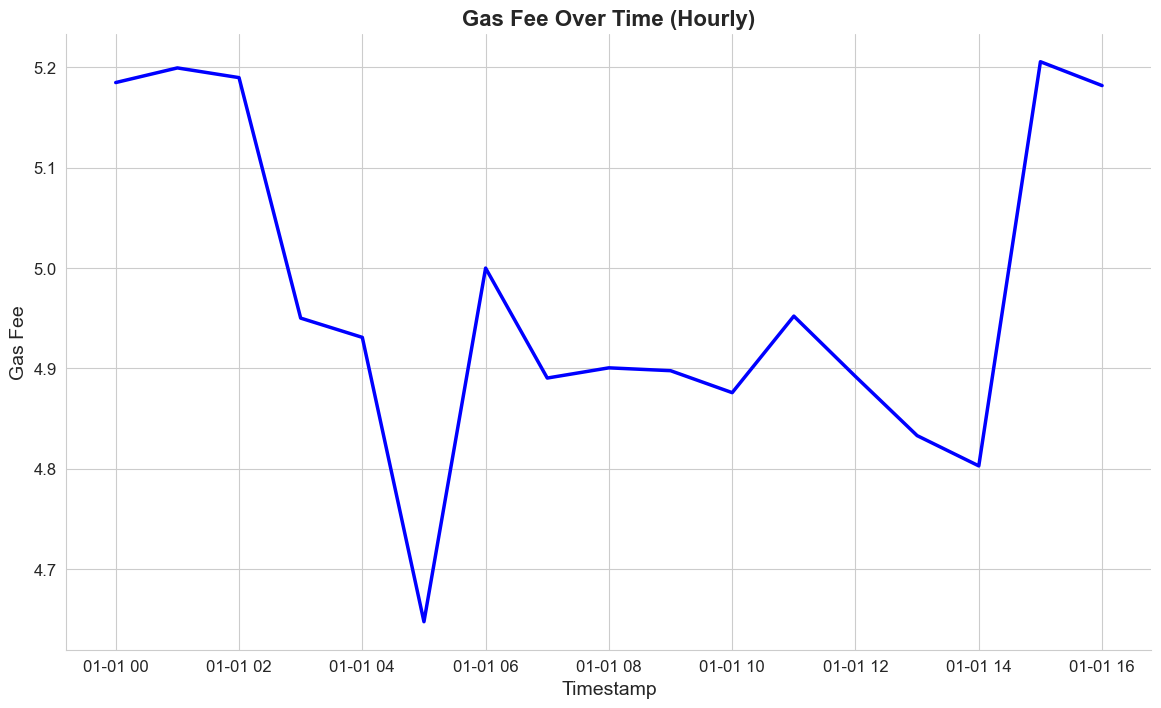

In [22]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x=df_resampled.index, y='Gas_Fee', data=df_resampled, linewidth=2.5, color='blue')
plt.title('Gas Fee Over Time (Hourly)', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Gas Fee', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


## Visualizations
Now that we have prepared the dataset and explored it, let's proceed with the visualizations to identify suspicious activities.

### Time Series Plot: Gas Fee Over Time
This time series plot shows how the gas fee varies over time. Any sudden spikes or drops could be considered as suspicious activities.

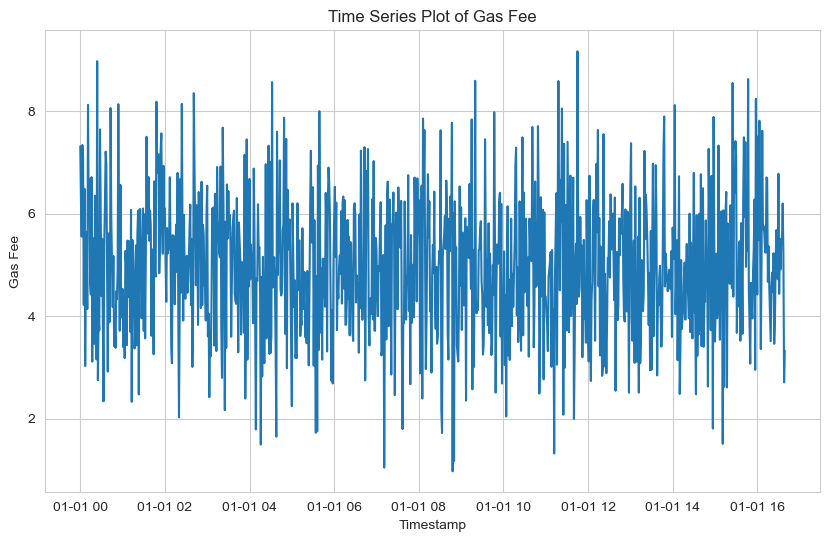

In [25]:
# Time series plot of Gas Fee
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timestamp', y='Gas_Fee', data=df)
plt.title('Time Series Plot of Gas Fee')
plt.xlabel('Timestamp')
plt.ylabel('Gas Fee')
plt.show()

## Additional Calculations
To further identify suspicious activities, we can perform some additional calculations.

In [30]:
# Calculate the average Gas Fee
avg_gas_fee = df['Gas_Fee'].mean()

# Identify transactions where the Gas Fee is significantly higher than average
suspicious_df = df[df['Gas_Fee'] > avg_gas_fee * 1.5]

# Display the suspicious transactions
suspicious_df

,Timestamp,Transaction_Type,Wallet_Balance,Network_Congestion,Transaction_Fee,Transaction_Amount,Gas_Fee,Hash_Rate,Block_Time
11,2022-01-01 00:11:00,Buy,6827.72990,52.575460,11.471551,645.427351,8.128259,96.229488,8.020355
24,2022-01-01 00:24:00,Sell,13549.10994,48.716279,13.784726,726.975462,8.982060,108.997308,9.803678
28,2022-01-01 00:28:00,Buy,15524.67696,47.389611,12.191247,653.277921,7.650085,93.740569,10.052493
43,2022-01-01 00:43:00,Buy,22793.47284,44.673743,13.447234,695.077539,8.065738,104.395223,9.681975
54,2022-01-01 00:54:00,Buy,27692.84784,41.791800,12.308445,497.181777,8.142793,92.835558,10.172905
94,2022-01-01 01:34:00,Sell,47318.82095,63.253082,11.870690,535.636640,7.505941,93.739417,12.161088
108,2022-01-01 01:48:00,Sell,54721.45149,40.172286,12.823240,692.294203,8.190354,88.616760,9.076212
115,2022-01-01 01:55:00,Sell,58759.15382,49.751730,12.323264,580.245640,7.572378,96.716989,7.833147
144,2022-01-01 02:24:00,Buy,73691.92349,62.286797,13.441205,738.314477,8.147642,96.232159,5.255612
161,2022-01-01 02:41:00,Sell,81963.26489,36.668706,13.366438,692.953205,8.355691,112.741550,8.631197


### Scatter Plot: Transaction Amount vs Gas Fee
This scatter plot helps us understand the relationship between the transaction amount and the gas fee. Any outliers here could be considered as suspicious activities.

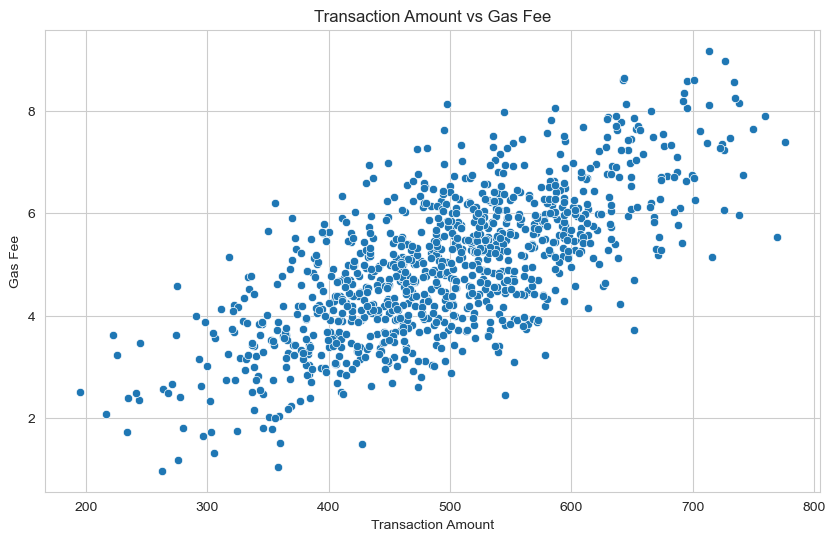

In [27]:
# Scatter plot of Transaction Amount vs Gas Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Gas_Fee', data=df)
plt.title('Transaction Amount vs Gas Fee')
plt.xlabel('Transaction Amount')
plt.ylabel('Gas Fee')
plt.show()

### Additional Calculations: Identifying Suspicious Transactions
To further identify suspicious activities, we can perform some additional calculations. For example, we can look for transactions where the gas fee is significantly higher than the average.

In [28]:
# Calculate the average Gas Fee
avg_gas_fee = df['Gas_Fee'].mean()

# Identify transactions where the Gas Fee is significantly higher than average
suspicious_df = df[df['Gas_Fee'] > avg_gas_fee * 1.5]

# Display the suspicious transactions
suspicious_df

,Timestamp,Transaction_Type,Wallet_Balance,Network_Congestion,Transaction_Fee,Transaction_Amount,Gas_Fee,Hash_Rate,Block_Time
11,2022-01-01 00:11:00,Buy,6827.72990,52.575460,11.471551,645.427351,8.128259,96.229488,8.020355
24,2022-01-01 00:24:00,Sell,13549.10994,48.716279,13.784726,726.975462,8.982060,108.997308,9.803678
28,2022-01-01 00:28:00,Buy,15524.67696,47.389611,12.191247,653.277921,7.650085,93.740569,10.052493
43,2022-01-01 00:43:00,Buy,22793.47284,44.673743,13.447234,695.077539,8.065738,104.395223,9.681975
54,2022-01-01 00:54:00,Buy,27692.84784,41.791800,12.308445,497.181777,8.142793,92.835558,10.172905
94,2022-01-01 01:34:00,Sell,47318.82095,63.253082,11.870690,535.636640,7.505941,93.739417,12.161088
108,2022-01-01 01:48:00,Sell,54721.45149,40.172286,12.823240,692.294203,8.190354,88.616760,9.076212
115,2022-01-01 01:55:00,Sell,58759.15382,49.751730,12.323264,580.245640,7.572378,96.716989,7.833147
144,2022-01-01 02:24:00,Buy,73691.92349,62.286797,13.441205,738.314477,8.147642,96.232159,5.255612
161,2022-01-01 02:41:00,Sell,81963.26489,36.668706,13.366438,692.953205,8.355691,112.741550,8.631197


### Extending the Dataset
To make the dataset more realistic and to facilitate further analysis, let's add more columns to it. We will add the following columns:
- `Transaction_Type`: Indicates the type of transaction (e.g., 'Buy', 'Sell').
- `Wallet_Balance`: The balance of the wallet after the transaction.
- `Network_Congestion`: A measure of how congested the network was at the time of the transaction.
- `Transaction_Fee`: The total fee for the transaction, including gas fees and additional charges.

### Additional Visualizations
With the extended dataset, we can now create additional visualizations to identify patterns and anomalies. Let's start by visualizing the relationship between the new columns.

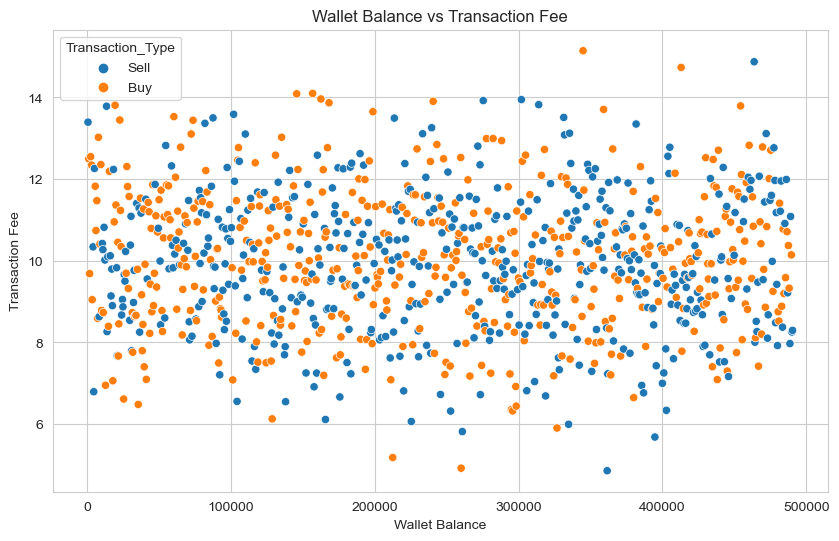

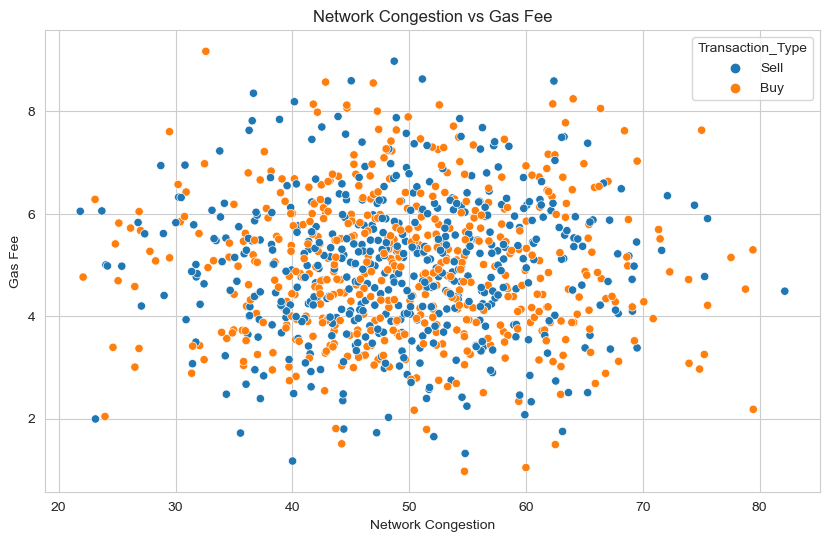

In [29]:
# Scatter plot of Wallet Balance vs Transaction Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wallet_Balance', y='Transaction_Fee', hue='Transaction_Type', data=df)
plt.title('Wallet Balance vs Transaction Fee')
plt.xlabel('Wallet Balance')
plt.ylabel('Transaction Fee')
plt.show()
# Scatter plot of Network Congestion vs Gas Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Network_Congestion', y='Gas_Fee', hue='Transaction_Type', data=df)
plt.title('Network Congestion vs Gas Fee')
plt.xlabel('Network Congestion')
plt.ylabel('Gas Fee')
plt.show()